In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('ToyotaCorolla.csv')

In [3]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
data.info()
#No null value is present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
data.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

C:\Users\patel\Anaconda3\envs\Project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

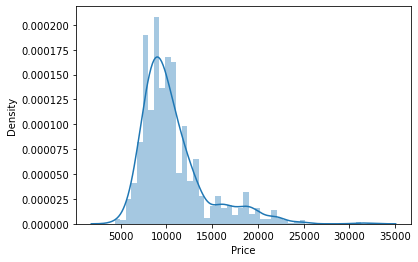

In [6]:
sns.distplot(data['Price'])
#target variable is positive skewed

C:\Users\patel\Anaconda3\envs\Project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

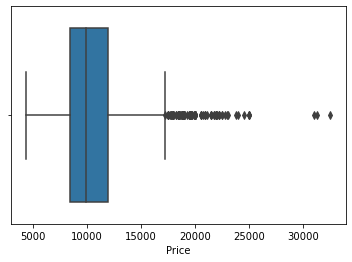

In [7]:
sns.boxplot(data['Price'])
#plethora of outliers detected

In [73]:
new_data=data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
#in problem statement it is already mentioned that use only these features for preditcting Price.

In [74]:
new_data.corr()
# finding correlation with target variable. Age is highly negetively correlated to Price. 

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scalar=StandardScaler()

In [77]:
new_data['Price']=scalar.fit_transform(data[['Price']])

<ipython-input-77-ac1d1e29be91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Price']=scalar.fit_transform(data[['Price']])


In [78]:
new_data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.763763,23,46986,90,2000,3,5,210,1165
1,0.832715,23,72937,90,2000,3,5,210,1165
2,0.887877,24,41711,90,2000,3,5,210,1165
3,1.163685,26,48000,90,2000,3,5,210,1165
4,0.832715,30,38500,90,2000,3,5,210,1170


In [79]:
import statsmodels.formula.api as sm 

In [80]:
model=sm.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=new_data).fit()

In [81]:
model.params

Intercept       -4.496766
Age_08_04       -0.033554
KM              -0.000006
HP               0.008738
cc              -0.000033
Doors           -0.000446
Gears            0.163919
Quarterly_Tax    0.001089
Weight           0.004677
dtype: float64

In [82]:
print(model.tvalues,'/n',model.pvalues)
#here cc and Doors features pvalue are 0.1790 and 0.9677 which is greater than 0.05 so we can remove those features from model.

Intercept       -11.551685
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 /n Intercept         1.428471e-29
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [83]:
model.rsquared
#model is quit good but here i trained model without removing outliers and influencing points.so from now I will focus to improve model.

0.8637627463428191

In [84]:
new_model=sm.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=new_data).fit()

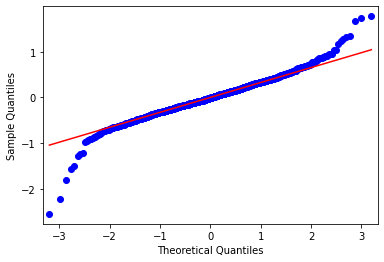

In [85]:
import statsmodels.api as s
qqplot=s.qqplot(new_model.resid,line='q')
plt.show()
#errors are following almost normal distribution except 6-9 points.now lets remove those points.

In [86]:
np.where(new_model.resid<-1)

(array([191, 192, 221, 393, 402, 601, 654, 960], dtype=int64),)

In [87]:
np.where(new_model.resid>1)

(array([  52,   74,  109,  110,  111,  125,  147,  171,  523, 1058],
       dtype=int64),)

In [88]:
new_data1=new_data.drop(index=[191, 192, 221, 393, 402, 601, 654, 960,52,   74,  109,  110,  111,  125,  147,  171,  523, 1058])

In [90]:
new_model1=sm.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=new_data1).fit()

In [91]:
model_influence = new_model1.get_influence()
(c, _) = model_influence.cooks_distance

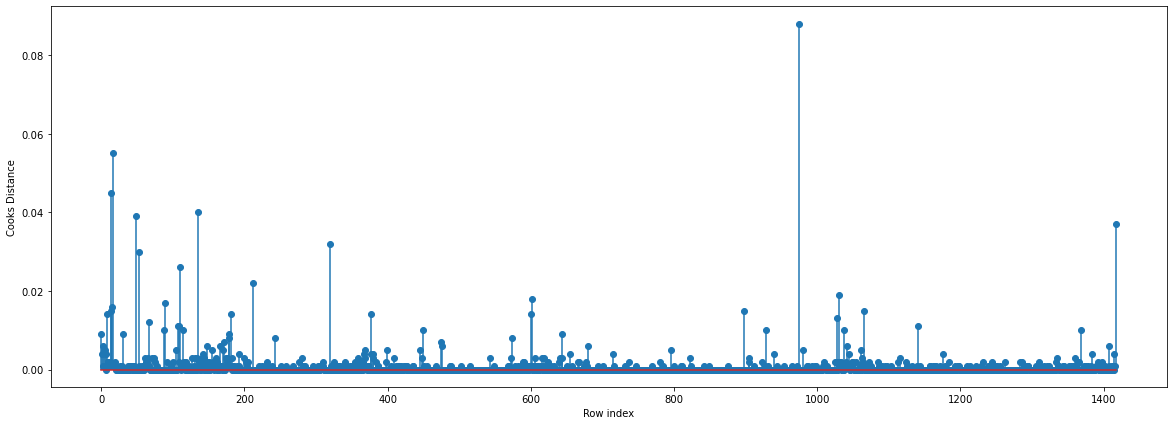

In [92]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(new_data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [93]:
(np.argmax(c),np.max(c))
#ao max value is 0.088 so dont need to remove those point.

(974, 0.08836588702003144)

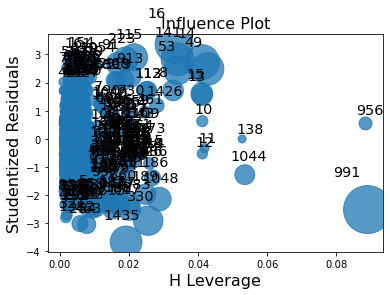

In [94]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(new_model1)
plt.show()
#so from graph we can remove those two points which have index values are 956 and 991

In [95]:
new_data2=new_data1.drop(index=[956,991])

In [97]:
new_model2=sm.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=new_data2).fit()

In [98]:
new_model2.rsquared
#So here we increase the accuracy by 2%.

0.883806296969495

In [113]:
pred_data=pd.DataFrame({'Age_08_04':[24,25,30],'KM':[46978,42368,50000],'HP':[90,120,60],'Gears':[4,5,6],'Quarterly_Tax':[220,75,50],'Weight':[1100,1065,1000]})

In [114]:
pred_data

,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
0,24,46978,90,4,220,1100
1,25,42368,120,5,75,1065
2,30,50000,60,6,50,1000


In [116]:
answer=new_model2.predict(pred_data)

In [117]:
answer

0    0.942495
1    1.197886
2    0.419538
dtype: float64

In [118]:
print(scalar.inverse_transform(answer))

[14148.03021833 15074.00060705 12251.94435927]
